In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df=sns.load_dataset('titanic')

In [71]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
df.shape

(891, 15)

In [73]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [74]:
df.drop(columns='deck',axis=1,inplace=True)


In [75]:
df.drop(columns='who',axis=1,inplace=True)


In [76]:
df.drop(columns='embark_town',axis=1,inplace=True)

In [77]:
df.drop(columns='alive',axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14792\3878914854.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_14792\3878914854.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_14792

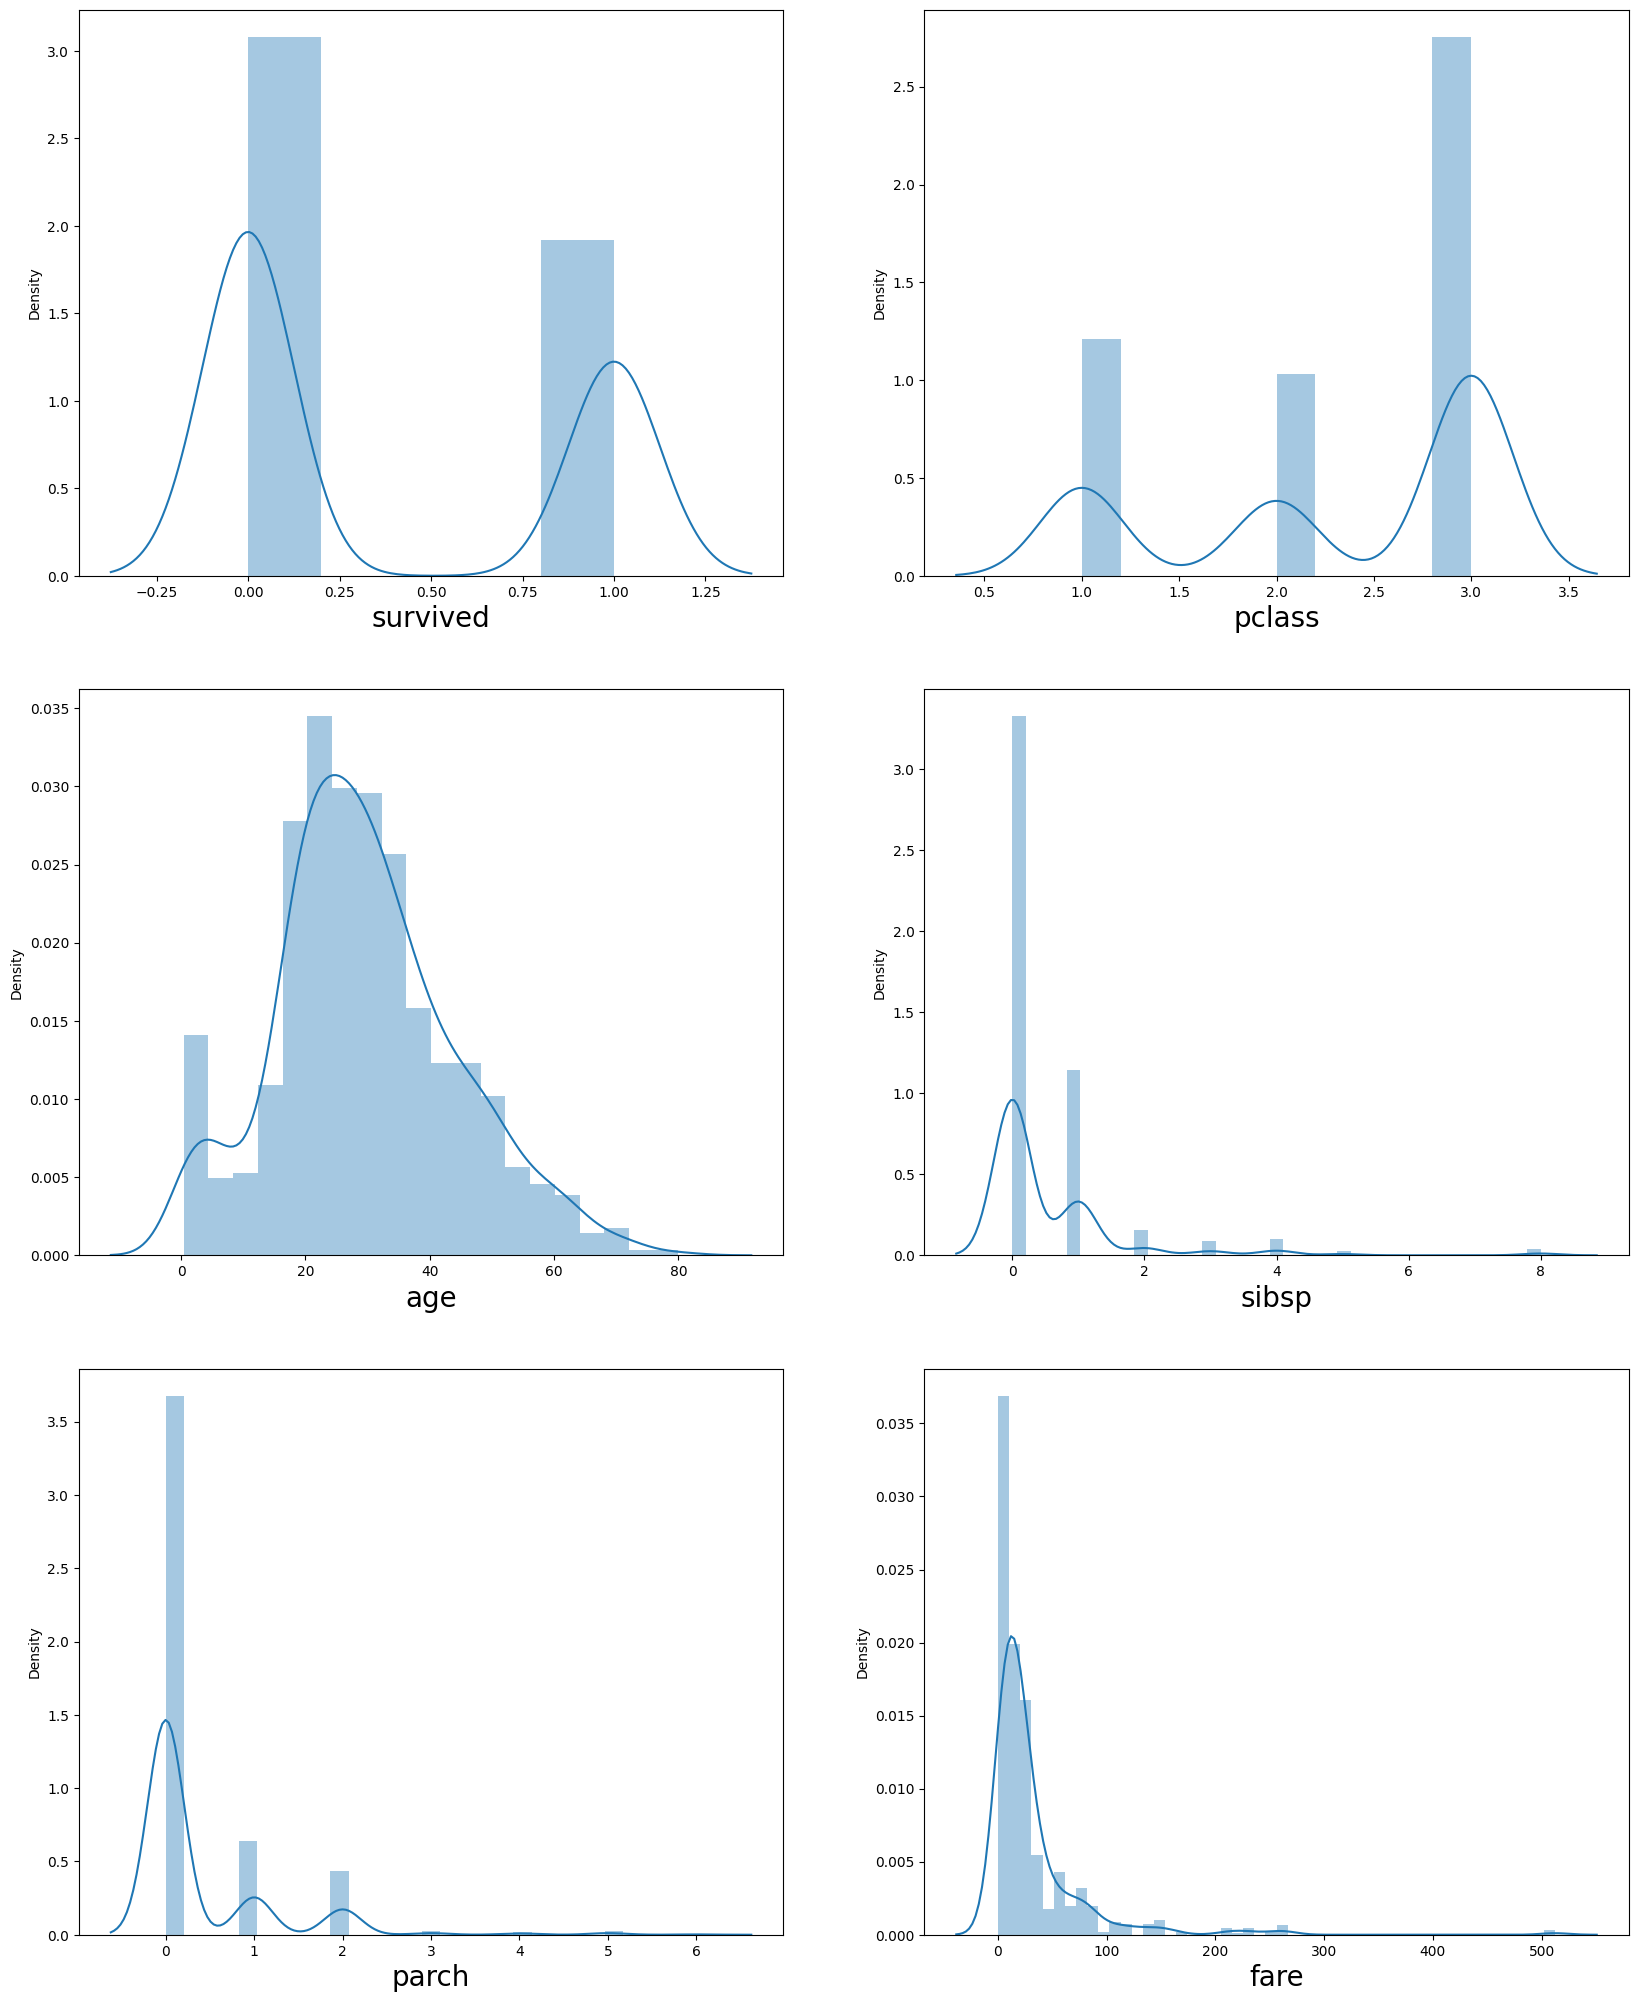

In [78]:
plotnumber=1
plt.figure(figsize=(20,25),facecolor='White')
for column in ['survived','pclass','age','sibsp','parch','fare']:
    ax=plt.subplot(3,2,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1

In [79]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [80]:
df['age'].fillna(df['age'].median(),inplace=True)
df.dropna(inplace=True)


In [81]:
print('sex',df['sex'].unique())
print('class',df['class'].unique())


print('adult_male',df['adult_male'].unique())

print('embarked',df['embarked'].unique())

sex ['male' 'female']
class ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
adult_male [ True False]
embarked ['S' 'C' 'Q']


In [82]:



categorical_features = ['sex', 'embarked','alone','class','adult_male'] 

for feature in categorical_features:

    label_encoder = LabelEncoder()
    df[feature + '_encoded'] = label_encoder.fit_transform(df[feature])
    
    
    one_hot_encoder = OneHotEncoder(sparse=False)
    one_hot_encoded = one_hot_encoder.fit_transform(df[feature + '_encoded'].values.reshape(-1, 1))
    
    categories = label_encoder.classes_
    for i, category in enumerate(categories):
        df[feature + '_' + str(category)] = one_hot_encoded[:, i]


df.drop(columns=[feature + '_encoded' for feature in categorical_features], inplace=True)
df.drop(columns=['sex','class','adult_male','embarked','alone'],inplace=True)
print(df.head())

   survived  pclass   age  sibsp  parch     fare  sex_female  sex_male  \
0         0       3  22.0      1      0   7.2500         0.0       1.0   
1         1       1  38.0      1      0  71.2833         1.0       0.0   
2         1       3  26.0      0      0   7.9250         1.0       0.0   
3         1       1  35.0      1      0  53.1000         1.0       0.0   
4         0       3  35.0      0      0   8.0500         0.0       1.0   

   embarked_C  embarked_Q  embarked_S  alone_False  alone_True  class_First  \
0         0.0         0.0         1.0          1.0         0.0          0.0   
1         1.0         0.0         0.0          1.0         0.0          1.0   
2         0.0         0.0         1.0          0.0         1.0          0.0   
3         0.0         0.0         1.0          1.0         0.0          1.0   
4         0.0         0.0         1.0          0.0         1.0          0.0   

   class_Second  class_Third  adult_male_False  adult_male_True  
0           0.

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\

## Creating a model

In [83]:
X=df.drop(columns=['survived'],axis=1)

In [84]:
y=df['survived']

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [87]:
scaler=StandardScaler()
scaler_x=scaler.fit_transform(X)

In [90]:
x_train,x_test,y_train,y_test=train_test_split(scaler_x,y,random_state=42)

In [92]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [96]:
predicted = model.predict(x_test)

In [97]:
accuracy = accuracy_score(y_test,predicted)
print('accuracy_score on train dataset : ', accuracy)


accuracy_score on train dataset :  0.8071748878923767


In [99]:
print('Classification report:',classification_report(y_test,predicted))

Classification report:               precision    recall  f1-score   support

           0       0.86      0.83      0.84       141
           1       0.72      0.77      0.75        82

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

